In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
from torch.autograd import grad

from binarypredictor.datagen import PolyGenerator
from binarypredictor.math import Polynomial
from binarypredictor.net import DerivativeNet

In [2]:
pg = PolyGenerator(2)
pg.add_constraint(0.5, 0, 0)
pg.add_constraint(0.1, 1, 3)
pg.add_constraint(0.8, 0, 5)

qg = PolyGenerator(2)
qg.add_constraint(0.3, 0, -1)
qg.add_constraint(0.1, 0, 7)
qg.add_constraint(0.4, 1, 1)

In [3]:
x = np.arange(0., 1.0, step=0.01)

poly_p = Polynomial()
poly_p.set_cfs(pg.get_cfs())
poly_dp = poly_p.get_derivative_poly(x)

poly_q = Polynomial()
poly_q.set_cfs(qg.get_cfs())
poly_dq = poly_q.get_derivative_poly(x)

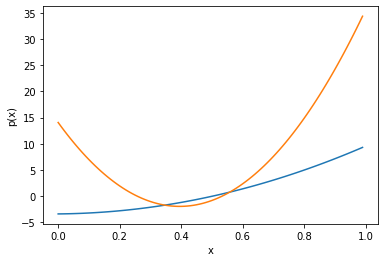

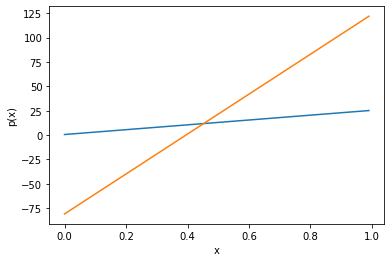

In [4]:
poly_p.plot(x)
poly_q.plot(x)
plt.show()

poly_dp.plot(x)
poly_dq.plot(x)

In [5]:
p = torch.tensor(poly_p.get_values(x))
q = torch.tensor(poly_q.get_values(x))

In [6]:
net = DerivativeNet(train=True)
optimizer = torch.optim.Adam(net.parameters(), lr=1e-3)

In [7]:
for i in range(10):
    #torch.autograd.set_detect_anomaly(True)
    inp = torch.hstack((p, q))
    out = net(inp.float())
    
    dPoly = Polynomial()
    dPoly.set_cfs(out)
    
    #dPoly.plot(x)
    #plt.show()
    
    x = torch.arange(0., 1., step=0.01)
    
    vals = dPoly.get_values(x)

    poly_dp_vals = poly_dp.get_values(dPoly.get_values(x))
    poly_dq_vals = poly_dq.get_values(x)
        
    #plt.plot(x.detach().numpy(), poly_dp_vals.detach().numpy())
    #poly_dq.plot(x.detach().numpy())
    
    optimizer.zero_grad()
    #loss = nn.MSELoss()(poly_dp_vals, poly_dq_vals)
    loss = nn.MSELoss()(vals, torch.ones_like(vals))
    loss.backward()
    optimizer.step()
        
    #print(inp.grad)
    #print(out.grad)
    
    print(loss)
    print()
    
    #break

None
None
tensor(48.0191, grad_fn=<MseLossBackward0>)

tensor(77.6859, grad_fn=<MseLossBackward0>)

tensor(23.2593, grad_fn=<MseLossBackward0>)

tensor(4.7195, grad_fn=<MseLossBackward0>)

tensor(23.4902, grad_fn=<MseLossBackward0>)

tensor(20.5901, grad_fn=<MseLossBackward0>)

tensor(6.5389, grad_fn=<MseLossBackward0>)

tensor(6.0010, grad_fn=<MseLossBackward0>)

tensor(14.3422, grad_fn=<MseLossBackward0>)

tensor(15.0025, grad_fn=<MseLossBackward0>)

